In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import unicodedata

%precision 3
%matplotlib inline

In [2]:
sns.set()
sns.set_style('darkgrid',{"axes.facecolor": ".9"})
sns.set_context('notebook')

In [3]:
suuji1 = set('一二三四五六七八九十百千１２３４５６７８９123456789')  # 数字と判定する文字集合
suuji2 = set('〇万億兆京０0,')  # 直前の文字が数字の場合に数字と判定する文字集合
tablekans = str.maketrans('〇一二三四五六七八九', '0123456789')

# 関数(1)_20桁までの漢数字（例：六千五百八）を数値変換する関数
def kans2num(text, n=4):  # 第2引数は省略可（原則省略）
    ans = poss = 0  # ans:初期値（計算結果を加算していく）、poss:スタート位置
    tais = '京兆億万' if n == 4 else '千百十'
    n = 1 if n != 4 else 4
    text = text.translate(str.maketrans({',': None, '，': None}))
    for i in range(0, len(tais) + 1):
        pos = text.find(tais[i]) if i != len(tais) else len(text)
        if pos == -1 or (i == len(tais) and pos == poss):  # 対象となる大数が無い場合
            continue
        else:
            block = 1 if i != len(tais) and pos == poss else \
                kans2num(text[poss:pos], 1) if n == 4 else \
                float(text[poss:pos].translate(tablekans))/10  # 'possとposの間の漢数字を変換
        ans += block * (10 ** (n * (len(tais) - i)))
        poss = pos + 1  # possをposの次の位置に設定
    return ans

In [4]:
df = pd.read_csv('data/sample-2.csv', encoding="utf_8_sig", header=None)
df.columns = ["name", "play", "like", "creator", "size", "date"]
df[:3]

name  play  like   creator  size                date
0                    南海の孤島   673    33       すがも   2MB  2020/4/15（水） 09:00
1  IchiKon Caffee 3号店 V8.1  6.7万   550  Ichitaro  63MB  2020/4/15（水） 09:00
2                      テスト   208     6  UnderDog  24MB  2020/4/14（火） 09:00

In [5]:
# likeの整形
index = 0
df['play'] = df['play'].str.replace('.', "")
p = np.zeros(len(df))
for i in df['play']:
    p[index] = kans2num(str(df['play'][index]))
    index += 1
df['play'] = p

In [6]:
df['like'] = df['like'].astype(int)
df['play'] = df['play'].astype(int)
df['size'] = df['size'].str[:-2]
df['size'] = df['size'].astype(int)
df['date'] = df['date'].str.split('（', expand=True)
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

In [7]:
df.describe()

play        like        size
count    456.000000  456.000000  456.000000
mean     242.905702   19.320175   31.589912
std     3297.848453   60.587259   47.913024
min        0.000000    1.000000    0.000000
25%        2.000000    3.000000    2.000000
50%        6.000000    5.000000   23.000000
75%       18.250000   12.000000   37.000000
max    67000.000000  866.000000  465.000000

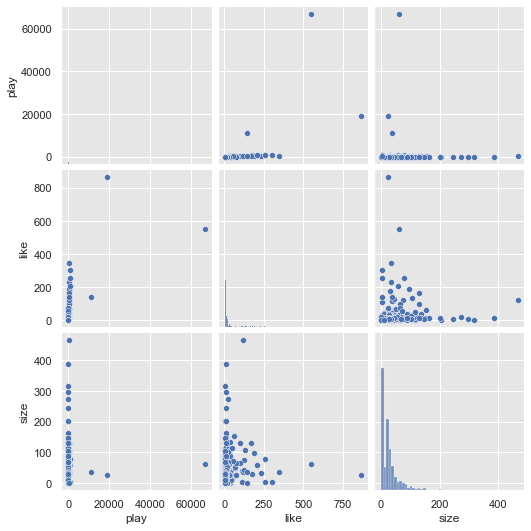

In [8]:
sns.pairplot(df)

(array([453.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([    0.,  6700., 13400., 20100., 26800., 33500., 40200., 46900.,
        53600., 60300., 67000.]),
 <BarContainer object of 10 artists>)

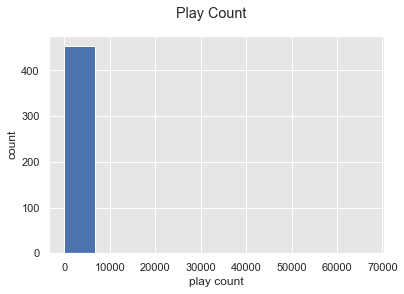

In [9]:
fig = plt.figure(figsize=(6, 4))
fig.suptitle('Play Count')
ax = fig.add_subplot(111, xlabel='play count', ylabel='count')
ax.hist(df['play'])

(array([209.,  92.,  55.,  18.,  19.,   8.,   1.,   9.,   9.,   3.]),
 array([ 1. ,  4.9,  8.8, 12.7, 16.6, 20.5, 24.4, 28.3, 32.2, 36.1, 40. ]),
 <BarContainer object of 10 artists>)

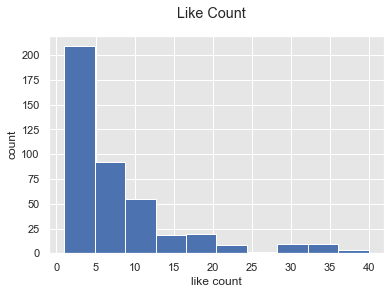

In [10]:
fig = plt.figure(figsize=(6, 4))
fig.suptitle('Like Count')
ax = fig.add_subplot(111, xlabel='like count', ylabel='count')
ax.hist(df['like'], range=(df['like'].min(), 40))

{'whiskers': [<matplotlib.lines.Line2D at 0x17d5f43c630>,
 'caps': [<matplotlib.lines.Line2D at 0x17d5f43cbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d5f42d0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x17d5f44c1d0>],
 'fliers': [],
 'means': []}

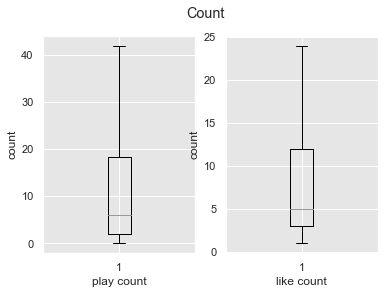

In [11]:
fig = plt.figure(figsize=(6, 4))
fig.suptitle('Count')
ax1 = fig.add_subplot(1, 2, 1, xlabel='play count', ylabel='count')
ax2 = fig.add_subplot(1, 2, 2, xlabel='like count', ylabel='count')
ax1.boxplot(df['play'], sym="")
ax2.boxplot(df['like'], sym="")